In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from pycaret.classification import setup, compare_models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load data
df = pd.read_csv("Training.csv", delimiter=',')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [ ]:
# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                202404 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

In [ ]:
# Data Cleaning and Handling Missing Data
df.dropna(subset=['Product Category'], inplace=True)  # Drop rows where Product Category is missing
df['Customer Age'].fillna(df['Customer Age'].mean(), inplace=True)  # Fill missing Customer Age with mean
df['Product Price'].fillna(df['Product Price'].mean(), inplace=True)  # Fill missing Product Price with mean
df['Returns'].fillna(df['Returns'].mean(), inplace=True)  # Fill missing Returns with mean

In [ ]:
# Handling Outliers
df = df[(df['Product Price'] >= df['Product Price'].quantile(0.05)) &
        (df['Product Price'] <= df['Product Price'].quantile(0.95))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225620 entries, 1 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            225620 non-null  int64         
 1   Purchase Date          225620 non-null  datetime64[ns]
 2   Product Category       225620 non-null  object        
 3   Product Price          225620 non-null  int64         
 4   Quantity               225620 non-null  int64         
 5   Total Purchase Amount  225620 non-null  int64         
 6   Payment Method         225620 non-null  object        
 7   Customer Age           225620 non-null  int64         
 8   Returns                225620 non-null  float64       
 9   Customer Name          225620 non-null  object        
 10  Age                    225620 non-null  int64         
 11  Gender                 225620 non-null  object        
 12  Churn                  225620 non-null  int64    

In [ ]:
# Data Encoding
label_encoder = LabelEncoder()
df['Product Category'] = label_encoder.fit_transform(df['Product Category'])
df['Payment Method'] = label_encoder.fit_transform(df['Payment Method'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [ ]:
# Drop Non-numeric and Irrelevant Columns
df = df.drop(columns=['Customer ID', 'Purchase Date', 'Customer Name'])

In [ ]:
# Feature Engineering: Creating new features (e.g., interaction terms)
df['Price_per_Return'] = df['Product Price'] / (df['Returns'] + 1)  # Adding 1 to avoid division by zero

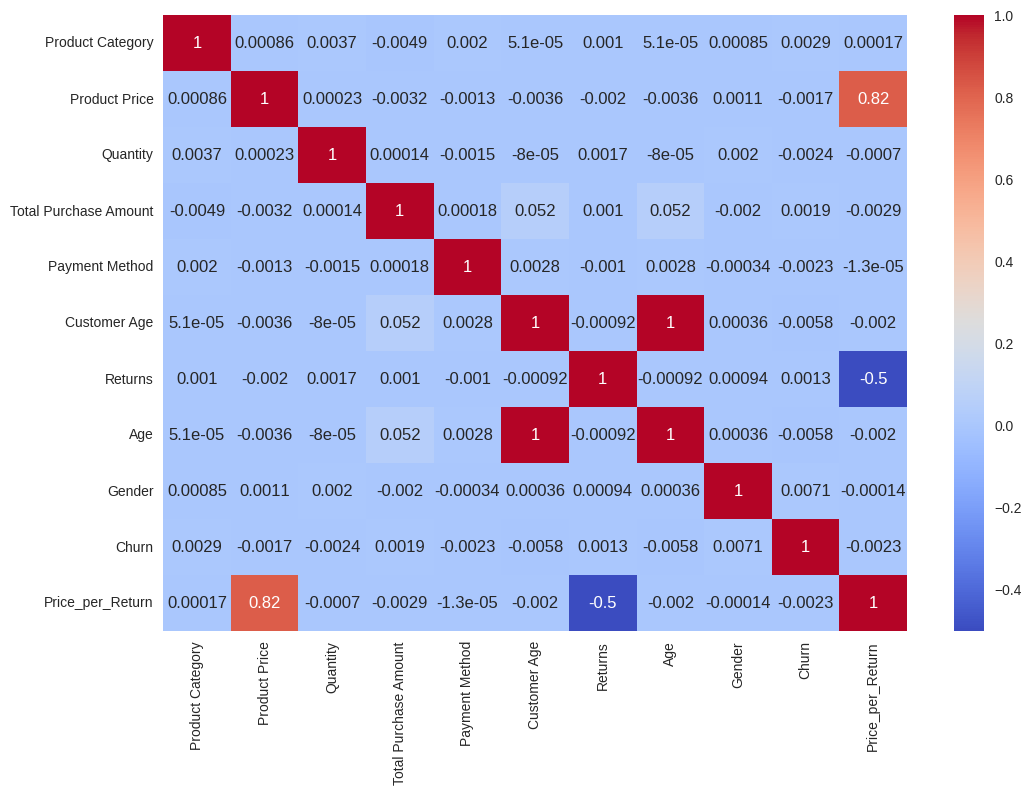

In [ ]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Feature Selection
X = df[['Product Category', 'Total Purchase Amount', 'Customer Age', 'Returns', 'Payment Method', 'Price_per_Return']]
y = df['Churn']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225620 entries, 1 to 249999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Product Category       225620 non-null  int64  
 1   Product Price          225620 non-null  int64  
 2   Quantity               225620 non-null  int64  
 3   Total Purchase Amount  225620 non-null  int64  
 4   Payment Method         225620 non-null  int64  
 5   Customer Age           225620 non-null  int64  
 6   Returns                225620 non-null  float64
 7   Age                    225620 non-null  int64  
 8   Gender                 225620 non-null  int64  
 9   Churn                  225620 non-null  int64  
 10  Price_per_Return       225620 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 20.7 MB


In [ ]:
# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Data Splitting
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Output the shapes to verify the splits
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (135372, 6), (135372,)
Validation data shape: (45124, 6), (45124,)
Testing data shape: (45124, 6), (45124,)


In [ ]:
# Handling Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Models initialization
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Neighbors': KNeighborsClassifier(),
}

In [ ]:
# Hyperparameter tuning
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40, 50]},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'K Neighbors': {'n_neighbors': [3, 5, 7, 9, 11]},
}

best_models = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


Best parameters for Logistic Regression: {'C': 0.01}
Best parameters for Decision Tree: {'max_depth': 10}
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best parameters for K Neighbors: {'n_neighbors': 11}


Logistic Regression validation accuracy: 0.8008376916939988
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     36137
           1       0.00      0.00      0.00      8987

    accuracy                           0.80     45124
   macro avg       0.40      0.50      0.44     45124
weighted avg       0.64      0.80      0.71     45124



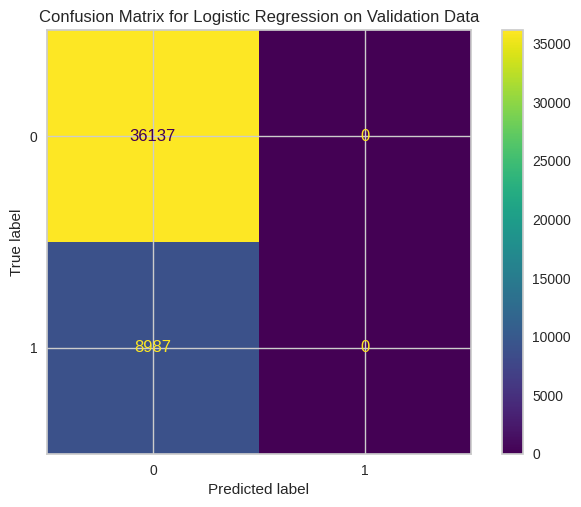

Decision Tree validation accuracy: 0.798909671128446
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     36137
           1       0.20      0.00      0.01      8987

    accuracy                           0.80     45124
   macro avg       0.50      0.50      0.45     45124
weighted avg       0.68      0.80      0.71     45124



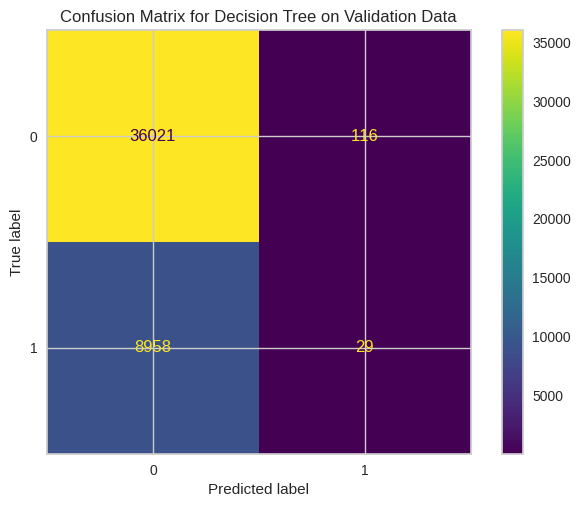

Random Forest validation accuracy: 0.8008155305380729
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     36137
           1       0.00      0.00      0.00      8987

    accuracy                           0.80     45124
   macro avg       0.40      0.50      0.44     45124
weighted avg       0.64      0.80      0.71     45124



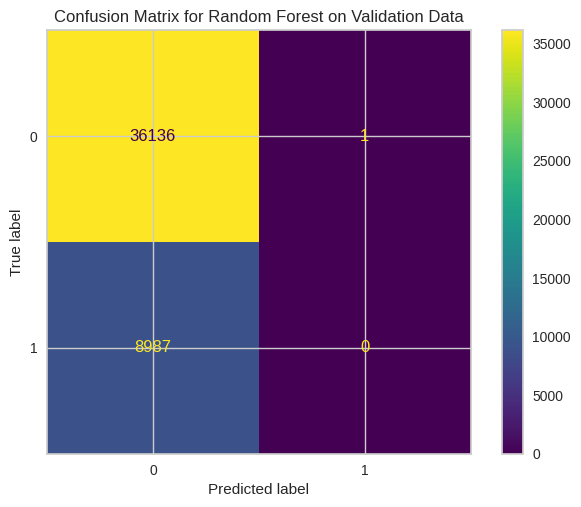

K Neighbors validation accuracy: 0.7938347664214166
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     36137
           1       0.19      0.01      0.02      8987

    accuracy                           0.79     45124
   macro avg       0.49      0.50      0.45     45124
weighted avg       0.68      0.79      0.71     45124



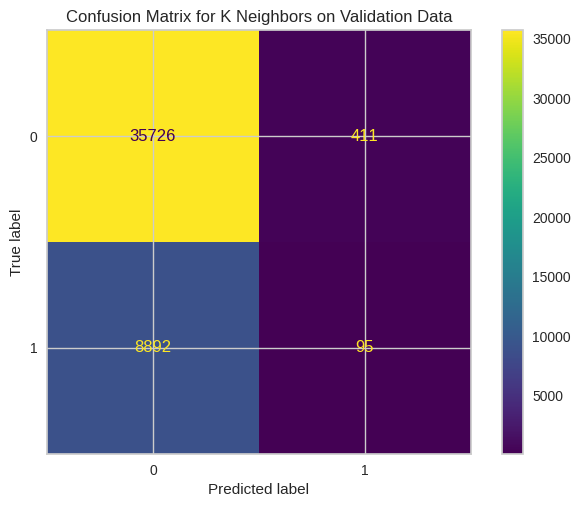

In [ ]:
# Model evaluation on validation set
for model_name in best_models:
    model = best_models[model_name]
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{model_name} validation accuracy: {accuracy}")
    print(classification_report(y_val, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()
    plt.title(f"Confusion Matrix for {model_name} on Validation Data")
    plt.show()

In [ ]:
# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

In [ ]:
# Evaluate each model on the validation set
for model_name in best_models:
    model = best_models[model_name]
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    # Append the results to the DataFrame using pd.concat
    results = pd.concat([results, pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1': [f1]
    })], ignore_index=True)


In [ ]:
# Highlight the highest values in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

In [ ]:
# Apply the highlight function to the results DataFrame
results.set_index('Model', inplace=True)
styled_results = results.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1'])

# Display the styled DataFrame
styled_results

,Accuracy,Precision,Recall,F1
Model,,,,
Logistic Regression,0.800838,0.641341,0.800838,0.712270
Decision Tree,0.798910,0.681176,0.798910,0.712517
Random Forest,0.800816,0.641337,0.800816,0.712259
K Neighbors,0.793835,0.678629,0.793835,0.712567


In [ ]:
# Create DataFrame for results
results_df = pd.DataFrame(results)

In [ ]:
# Display results
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.799752   0.639603  0.799752  0.710768  0.500039
1        Decision Tree  0.798777   0.686048  0.798777  0.711079  0.509540
2        Random Forest  0.799685   0.679653  0.799685  0.710777  0.510122
3          K Neighbors  0.793746   0.685831  0.793746  0.712360  0.509234
